In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


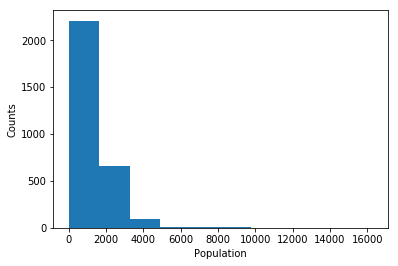

1387.9633333333334
1152.5
0    1128.0
dtype: float64


In [3]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data['Population'])
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(california_data['Population'].mean())
print(california_data['Population'].median())
print(california_data['Population'].mode())

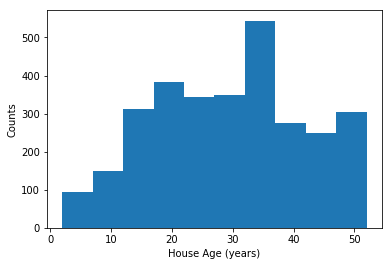

NormaltestResult(statistic=3.493057988185698, pvalue=0.1743781618508599)


In [4]:
# Determine if the house age in California is normally distributed
plt.hist(california_data['HouseAge'])
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(california_data["HouseAge"].sample(100)))

In [5]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = california_data['AveOccup'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_occupancy = california_data.loc[(california_data['AveOccup'] < lower_bound) | (california_data['AveOccup'] > upper_bound)]
outlier_occupancy

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.2974592743428355
The interquartile range of occupancy is: 0.8723682937387878
The the median of occupancy is: 2.81970199317512 
Values below 1.116538539995866 could be outliers.
Values above 4.606011714951017 could be outliers.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
181,4.8875,9.0,5.735849,1.015094,1250.0,4.716981,32.69,-117.06
189,0.9204,43.0,4.164557,1.012658,1253.0,5.286920,38.59,-121.48
209,4.1000,30.0,4.576687,1.055215,1048.0,6.429448,33.73,-117.90
210,3.4250,28.0,4.841727,1.046763,1575.0,5.665468,33.75,-117.90
212,1.5635,17.0,3.412651,1.043675,3200.0,4.819277,37.29,-120.48


In [6]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f"The minimum median income of the potential outliers is {outlier_occupancy['MedInc'].min()}")
print(f"The maximum median income of the potential outliers is {outlier_occupancy['MedInc'].max()}")

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


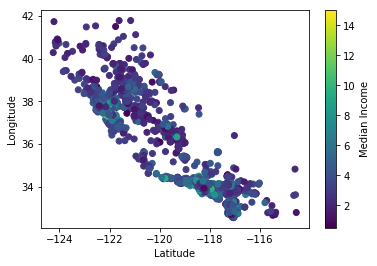

In [7]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(california_data['Longitude'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Latitude")
plt.ylabel("Longitude")
clb.set_label("Median Income")
plt.show()